# Graph generation notebook

Cells are in sequence, so if you just press **run all cells** in the menu the graphs should be created at the very bottom. Warning, the time it function cause prints, so the eventually the length of this page will be considerable. Also this process will likely take multiple hours and this file needs to be able to import the associated files, so running this in the same directory is adviced.

In [1]:
import Task11
import Task12
import Task21
import Task31
import Task43
import Task51
import Task53
import Task55
from sanitize_input import Tests
import random
import numpy as np
import matplotlib.pyplot as plt
from itertools import count
import matplotlib
from math import sqrt
from statistics import mean, stdev
SPINE_COLOR = 'gray'

In [15]:
def random_kd_coords(n, d):
    return [[random.randrange(1, 1000, 1) for _ in range(d)] for _ in range(n)]


def create_test_ns_kd(d):
    return [random_kd_coords(10**i, d) for i in range(1, 7)]


def random_boundkd(d):
    a = [random.randrange(1, 999, 1) for _ in range(d)]
    b = [random.randrange(i, 1000, 1) for i in a]
    return a, b


def bruteforce_kd(n, *_, d=2, c=100):
    res = []
    bounds = [random_boundkd(d) for _ in range(c)]
    for e in n:
        bres = []
        b = len(e)
        print(f'---{b}---')
        for l, u in bounds:
            a = get_ipython().run_line_magic(
                'timeit', '-o -r1 list(Task31.simple_range_query(e, l, u))')
            bres.append(a)
        res.append((b, bres))
    return res


def build_kd_tree(n, *_, d=2, c=100):
    res = []
    for e in n:
        bres = []
        b = len(e)
        print(f'---{b}---')
        for i in (random_kd_coords(b, d) for _ in range(c)):
            a = get_ipython().run_line_magic('timeit', '-o -r1 Task43.KDTree(i)')
            bres.append(a)
        res.append((b, bres))
    return res


def kd_tree_without_contained(e, *_, d=2, c=100):
    res = []
    bounds = [random_boundkd(d) for _ in range(c)]
    for n in e:
        d = len(n)
        a = Task43.KDTree(n).root
        bres = []
        print(f'---{d}---')
        for l, u in bounds:
            b = list(zip(l, u))
            c = get_ipython().run_line_magic('timeit', '-o -r1 Task53.get_range(a, b)')
            bres.append(c)
        res.append((d, bres))
    return res


def kd_tree_with_contained(e, *_, d=2, c=100):
    res = []
    bounds = [random_boundkd(d) for _ in range(c)]
    for n in e:
        bres = []
        d = len(n)
        a = Task43.KDTree(n).root
        print(f'---{d}---')
        for l, u in bounds:
            b = list(zip(l, u))
            c = get_ipython().run_line_magic('timeit', '-o -r1 Task51.get_range(a, b)')
            bres.append(c)
        res.append((d, bres))
    return res


def try_kd_bounds():
    res = []
    funcs = [bruteforce_kd, build_kd_tree,
             kd_tree_without_contained, kd_tree_with_contained]
    ds = [2, 3, 5, 10, 50]
    es = (random_kd_coords(100_000, d) for d in ds)
    for d, e in zip(ds, es):
        print(d, len(e))
        bres = []
        print(d)
        for f in funcs:
            print(f.__name__)
            bres.append((f.__name__, f([e], d=d)))
        res.append(bres)
    return res


def try_e_kd_bounds(es, d=2):
    funcs = [bruteforce_kd, build_kd_tree,
             kd_tree_without_contained, kd_tree_with_contained]
    return [(f.__name__, f(create_test_ns_kd(2), d=d)) for f in funcs if not print(f.__name__)]

In [3]:
def random_sphere_coords(n, d):
    return [[random.randrange(1, 1000, 1) for _ in range(d)] for _ in range(n)]


def create_test_ns_sphere(d):
    return [random_sphere_coords(10**i, d) for i in range(1, 7)]


def random_sphere_boundkd(d):
    a = random_sphere_coords(1, d)[0]
    b = random.randrange(0, 500, 1)
    return a, b


random_sphere_boundkd(5)


def sphere_query(e, *_, d=2, c=100):
    res = []
    bounds = [random_sphere_boundkd(d) for _ in range(c)]
    for n in e:
        bres = []
        d = len(n)
        a = Task43.KDTree(n).root
        print(f'---{d}---')
        for b in bounds:
            c = get_ipython().run_line_magic('timeit', '-o -r1 Task55.sphere_query(a, b)')
            bres.append(c)
        res.append((d, bres))
    return res


def try_sphere_bounds():
    res = []
    funcs = [sphere_query]
    ds = [2, 3, 5, 10, 50]
    es = (random_sphere_coords(100_000, d) for d in ds)
    for d, e in zip(ds, es):
        print(d, len(e))
        bres = []
        print(d)
        for f in funcs:
            print(f.__name__)
            bres.append((f.__name__, f([e], d=d)))
        res.append(bres)
    return res


def try_sphere_e_bounds(es, d=2):
    funcs = [sphere_query]
    return [(f.__name__, f(create_test_ns_sphere(2), d=d)) for f in funcs if not print(f.__name__)]

In [4]:
def random_bound1d():
    a = random.randrange(1, 999, 1)
    return a, random.randrange(a, 1000, 1)


def niave_1dbench(elements, *_):
    bounds = [random_bound1d() for _ in range(100)]
    res = []
    for n in elements:
        bres = []
        b = len(n)
        print(f'---{b}---')
        for l, u in bounds:
            a = get_ipython().run_line_magic('timeit', '-o -r1 list(Task11.get_range(n, l, u))')
            bres.append(a)
        res.append((b, bres))
    return res


def build_range_tree(elements, *_):
    res = []
    for n in elements:
        resb = []
        b = len(n)
        print(f'---{b}---')
        for n in range(100):
            m = [random.randrange(1, 1000, 1) for _ in range(b)]
            a = get_ipython().run_line_magic('timeit', '-o -r1 Task21.RangeTree(m)')
            resb.append(a)
        res.append((b, resb))
    return res


def build_sorted_list(elements, *_):
    res = []
    for n in elements:
        resb = []
        b = len(n)
        print(f'---{b}---')
        for i in range(100):
            m = [random.randrange(1, 1000, 1) for _ in range(b)]
            a = get_ipython().run_line_magic('timeit', '-o -r1 Task12.SortedRangeList(m)')
            resb.append(a)
        res.append((b, resb))
    return res


def tree_search_only(elements, *_):
    objs = (Task21.RangeTree(e) for e in elements)
    bounds = [random_bound1d() for _ in range(100)]
    res = []
    for i, n in enumerate(objs):
        bres = []
        b = 10**(i+1)
        print(f'---{b}---')
        for l, h in bounds:
            a = get_ipython().run_line_magic('timeit', '-o -r1 n.one_d_range_query(l, h)')
            bres.append(a)
        res.append((b, bres))
    return res


def b_search_only(elements, *_):
    objs = (Task12.SortedRangeList(e) for e in elements)
    bounds = [random_bound1d() for _ in range(100)]
    res = []
    for i, n in enumerate(objs):
        bres = []
        b = 10**(i+1)
        print(f'---{b}---')
        for l, h in bounds:
            #            print(l, h)
            a = get_ipython().run_line_magic('timeit', '-o -r1 n.get_range(l, h)')
            bres.append(a)
        res.append((b, bres))
    return res


def try_1d_bounds(es):
    funcs = [niave_1dbench,  # b_search_with_build, tree_search_with_build,
             build_range_tree, build_sorted_list, tree_search_only,
             b_search_only]
    return [(r.__name__, r(es)) for r in funcs if not print(r.__name__)]


def create_n_sizes():
    n10 = [random.randrange(1, 1000, 1) for n in range(10)]
    n100 = [random.randrange(1, 1000, 1) for n in range(100)]
    n1_000 = [random.randrange(1, 1000, 1) for n in range(1_000)]
    n10_000 = [random.randrange(1, 1000, 1) for n in range(10_000)]
    n100_000 = [random.randrange(1, 1000, 1) for n in range(100_000)]
    n1_000_000 = [random.randrange(1, 1000, 1) for n in range(1_000_000)]
    return [n10, n100, n1_000, n10_000, n100_000, n1_000_000]

In [ ]:
#var_rect_ele = try_e_kd_bounds(create_test_ns_kd(2))
#var_rect_dim = try_kd_bounds()
#var_sphere_ele = try_sphere_e_bounds(create_test_ns_sphere(2))
#var_sphere_dim = try_sphere_bounds()
#var_1d_data = try_1d_bounds(create_n_sizes())

In [5]:
def add_thing(new, to):
    for di, d in enumerate(to):
        d.append(new[di][0])

In [13]:
def replace(a):
    for fi, f in enumerate(a):
        fname = f[0]
        fvals = f[1]
        for ni, n in enumerate(fvals):
            fvals[ni] = n[1]

In [181]:
def replace2(a):
    for di, d in enumerate(a):
        for fi, f in enumerate(d):
            a[di][fi] = list(a[di][fi])
            a[di][fi][1] = a[di][fi][1][0][1]

In [8]:
def new_one(old):
    new = [
           ('bruteforce', []),
           ('build_kd_tree', []),
           ('kd_tree_without_contained', []),
           ('kd_tree_with_contained', []),
           ('sphere_query', [] )
          ]
    dims = [2,3,5,10,50]
    for di, d in enumerate(old):
        for fi, f in enumerate(d):
            t = list(old[fi][di][1])
            t[0] = dims[fi]
            new[di][1].append(t)
    return new

In [9]:
def convert_pickle(b):
    # where b in the pickle result
    for ini, i in enumerate(b):
        name = i[0]
        name_values = i[1]
        for jnj, j in enumerate(name_values):
            number = j[0]
            number_values = [e.average for e in j[1]]
            b[ini][1][jnj] = (number, mean(number_values), stdev(number_values))

In [11]:
def convert_pickle_kd_a(a):
    for fi, f in enumerate(a):
        fname = f[0]
        fvalues = f[1]
        for ni, n in enumerate(fvalues):
            n_size = n[0]
            results = n[1]
            #print(a[fi][1][ni])
            a[fi][1][ni] = list(a[fi][1][ni])
            t = [j.average for j in results]
            a[fi][1][ni][1] = (n_size, mean(t), stdev(t))

In [12]:
def convert_pickle_kd_b(b):
    for di, d in enumerate(b):
        for fi, f in enumerate(d):   
            fname = f[0]
            fvalues = f[1][0]
            n_size = fvalues[0]
            results = fvalues[1]
            t = [j.average for j in results]
            b[di][fi][1][0] = list(b[di][fi][1][0])
            b[di][fi][1][0][1] = (n_size, mean(t), stdev(t))

In [ ]:
one_d = try_1d_bounds(create_n_sizes())
sphere_var_elements = try_sphere_e_bounds(create_test_ns_sphere(2))
sphere_var_dimensions = try_sphere_bounds()
rect_var_elements = try_e_kd_bounds(create_test_ns_kd(2))
rect_var_dimensions = try_kd_bounds()

In [220]:
d = one_d
a = rect_var_elements
b = rect_var_dimensions
a.append(sphere_var_elements[0])
add_thing(sphere_var_dimensions, b)

In [ ]:
convert_pickle(d)
convert_pickle_kd_a(a)
convert_pickle_kd_b(b)
replace(a)
replace2(b)
c=new_one(b)

In [31]:
def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': ['\\usepackage{gensymb}'],
              'axes.labelsize': 14, # fontsize for x and y labels (was 10)
              'axes.titlesize': 14,
#              'text.fontsize': 10, # was 10
              'legend.fontsize': 14, # was 10
              'xtick.labelsize': 14,
              'ytick.labelsize': 14,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)


def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)
    return ax

In [32]:
nameskd = ["Bruteforce", "Build KD-tree", "KD-tree only intersection", "KD-tree with contained", "KD-tree with n-sphere range"] 
names1d = ["Bruteforce", "Build Tree", "Sort Array", "Tree search", "Binary search"]

In [44]:
def d1_plot(n_sizes, dis, title, names):
    fig, ax = plt.subplots()
    le = n_sizes
    for p,i in enumerate(dis):
        a = [str(10**i) for i in range(1,7)]
        plt.yscale('log')
        err = np.array([e[2] for e in i[1]])
        v = np.array([e[1] for e in i[1]])
        print(v,'woot', err)
        ax.errorbar(a, v, err, fmt='o:', label=names[p], capsize=7)
        ax.legend()

    ax.set_xlabel("Amount of points")
    ax.set_ylabel("Seconds (log scale)")
    ax.set_title(title)
    #plt.axis([10, int(1e6), 0, 4])

In [38]:
def draw_plot2(n, data, title, names):
    fig, ax = plt.subplots()
    a = [str(10**i) for i in range(1,n)]
    for p,i in enumerate(data):
        plt.yscale('log')
        err = np.array([e[2] for e in i[1]])
        v = np.array([e[1] for e in i[1]])
        print(a, v, err)
        ax.errorbar(a, v, err, fmt='o:', label=names[p], capsize=7)
    ax.legend()
    ax.set_xlabel("Amount of points")
    ax.set_ylabel("Seconds (log scale)")
    ax.set_title(title)
    width = 12.9
    format_axes(ax)
    latexify(width, width*(sqrt(5)-1.0)/2.0 )
    fig.savefig(f"{title}.png")
    plt.show()

In [39]:
def draw_plot3(n, data, title, names):
    fig, ax = plt.subplots()
    for p,i in enumerate(data):
        plt.yscale('log')
        err = np.array([e[2] for e in i[1]])
        v = np.array([e[1] for e in i[1]])
        a = np.array([str(e[0]) for e in i[1]])
        ax.errorbar(a, v, err, fmt='o:', label=names[p], capsize=7)
    ax.legend()
    ax.set_xlabel("Amount of points")
    ax.set_ylabel("Seconds (log scale)")
    ax.set_title(title)
    width = 12.9
    format_axes(ax)
    latexify(width, width*(sqrt(5)-1.0)/2.0 )
    fig.savefig(f"{title}.png")
    plt.show()

In [ ]:
draw_plot2(7, a, "Time taken for KD range search, 2d+", nameskd)

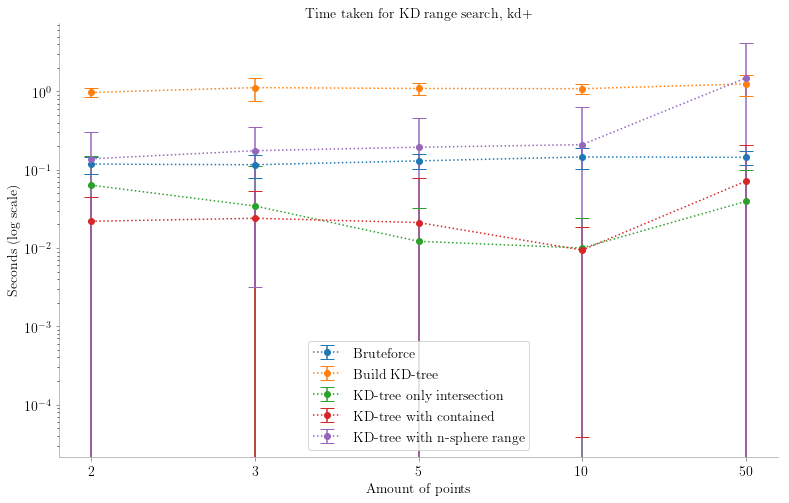

In [186]:
draw_plot3(6, c, "Time taken for KD range search, kd+", nameskd)

[2.25198226e-06 1.00600306e-05 7.83936319e-05 7.34460111e-04
 8.89415719e-03 8.65187839e-02] woot [1.05846570e-06 3.74736993e-06 2.20155440e-05 1.70784320e-04
 2.85781570e-03 2.39743876e-02]
[2.07417674e-05 2.36678033e-04 2.20138160e-03 2.67321240e-02
 3.63332986e-01 3.40495989e+00] woot [1.57427445e-06 3.52414125e-05 2.02558348e-04 2.54705327e-03
 9.33694140e-02 4.33607898e-01]
[1.71139310e-06 7.05654613e-06 1.44457939e-04 1.60664638e-03
 2.01891915e-02 2.34796242e-01] woot [5.94892893e-07 2.06142304e-06 3.97116162e-05 2.19442705e-04
 2.28504827e-03 9.38142444e-03]
[4.80523335e-06 3.80027121e-05 3.42461624e-04 3.20808566e-03
 4.05592116e-02 4.70505434e-01] woot [2.28003056e-06 3.17483355e-05 3.20441882e-04 2.90104752e-03
 4.03654572e-02 6.36770186e-01]
[4.65457894e-06 7.61504391e-06 2.99399097e-05 3.40982669e-05
 3.28932854e-04 1.06832396e-02] woot [1.94488833e-06 3.37260853e-06 2.80318510e-05 2.00495798e-05
 4.17763606e-04 1.00338304e-02]


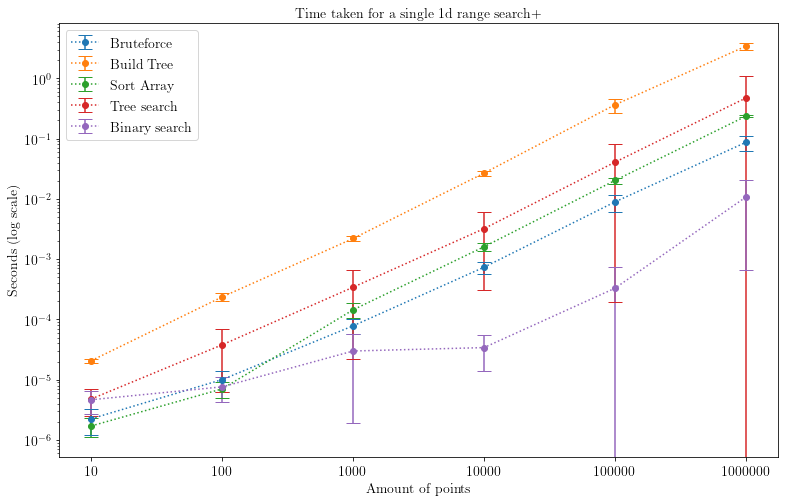

In [61]:
d1_plot(7, d, "Time taken for a single 1d range search+", names1d)